In [1]:
import pandas as pd

df = pd.read_csv("..\\Data\\Salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking if any null values exists

In [2]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


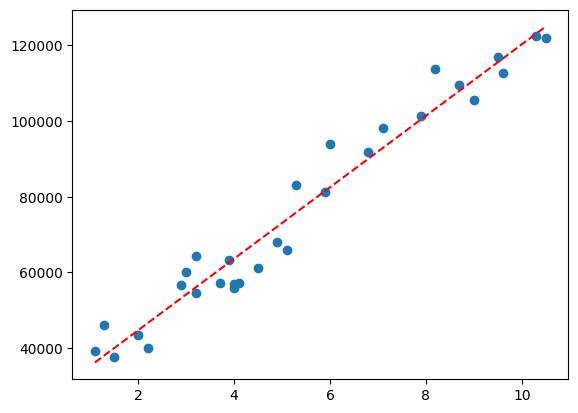

In [4]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
import numpy as np

pl.plot(df['YearsExperience'],df['Salary'],'o')

#Calculating Trend Line
z = np.polyfit(df['YearsExperience'],df['Salary'],1)
p = np.poly1d(z)
pl.plot(df['YearsExperience'],p(df['YearsExperience']),"r--")
#sns.scatterplot(data=df, x='YearsExperience',y='Salary')


# Corelation is between features is 0.978242
## Perfect Linear relationship between the two features. 

In [6]:
# import plotly.express as px
# import plotly.graph_objects as go

# px.scatter(data_frame=df, x='YearsExperience', y='Salary', size='YearsExperience',trendline='ols')



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X = df['YearsExperience']
# y = df['Salary']

X = np.asanyarray(df[["YearsExperience"]])
y = np.asanyarray(df[["Salary"]])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predValues = model.predict(X_test)



Text(0.5, 1.0, 'Prediction')

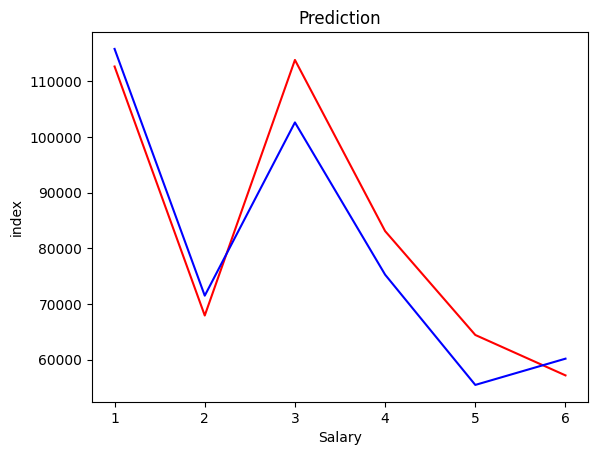

In [14]:
#Plotting the Actual and Predicted values

val = [i for i in range (1,len(y_test)+1,1)]
plt.plot(val,y_test,color='r',linestyle='-')
plt.plot(val,predValues,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_true=y_test, y_pred=predValues)
rmse = np.sqrt(mean_squared_error(y_test,y_pred=predValues))
rmse, r2

(7059.04362190151, 0.9024461774180497)